In [64]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import chardet
import seaborn as sns

In [15]:
# Read the first 101 rows to understand the data
gis_data= pd.read_csv('GIS.csv', encoding=encoding, decimal='.', nrows=101)
print(gis_data_sample)

     Old_Ref  Ref ID Record Last Updated (dd/mm/yyyy)  \
0    N00053B       1                           7/7/09   
1      AA110       2                       20/11/2017   
2      B0730       3                           4/6/20   
3    1106000       4                       18/12/2003   
4      AA110       2                       20/11/2017   
..       ...     ...                              ...   
96   1106000       4                       18/12/2003   
97     AA110       2                       20/11/2017   
98     B0730       3                           4/6/20   
99   1106000       4                       18/12/2003   
100    AA110       2                       20/11/2017   

                                        Operator  \
0                                     RWE npower   
1    Orsted (formerly Dong Energy) / Peel Energy   
2             Scottish and Southern Energy (SSE)   
3                         Energy Power Resources   
4    Orsted (formerly Dong Energy) / Peel Energy   
.. 

In [18]:
# Print the first few rows to verify the data
print(gis_data.head())

   Old_Ref  Ref ID Record Last Updated (dd/mm/yyyy)  \
0  N00053B       1                           7/7/09   
1    AA110       2                       20/11/2017   
2    B0730       3                           4/6/20   
3  1106000       4                       18/12/2003   
4    AA110       2                       20/11/2017   

                                      Operator  \
0                                   RWE npower   
1  Orsted (formerly Dong Energy) / Peel Energy   
2           Scottish and Southern Energy (SSE)   
3                       Energy Power Resources   
4  Orsted (formerly Dong Energy) / Peel Energy   

                        Site_Name      Technology_Type  Storage Type  \
0  Aberthaw Power Station Biomass  Biomass (co-firing)           NaN   
1           Hunterston - cofiring  Biomass (co-firing)           NaN   
2   Ferrybridge Multifuel 2 (FM2)     EfW Incineration           NaN   
3  Thetford Biomass Power Station  Biomass (dedicated)           NaN   
4       

In [19]:
# Extract the specified variables
selected_variables = ['Old_Ref', 'Operator', 'Site_Name', 'Technology_Type', 'Installed_Capacity',
                      'Development_Status', 'Region', 'Post_Code', 'X_coordinate', 'Y_coordinate']


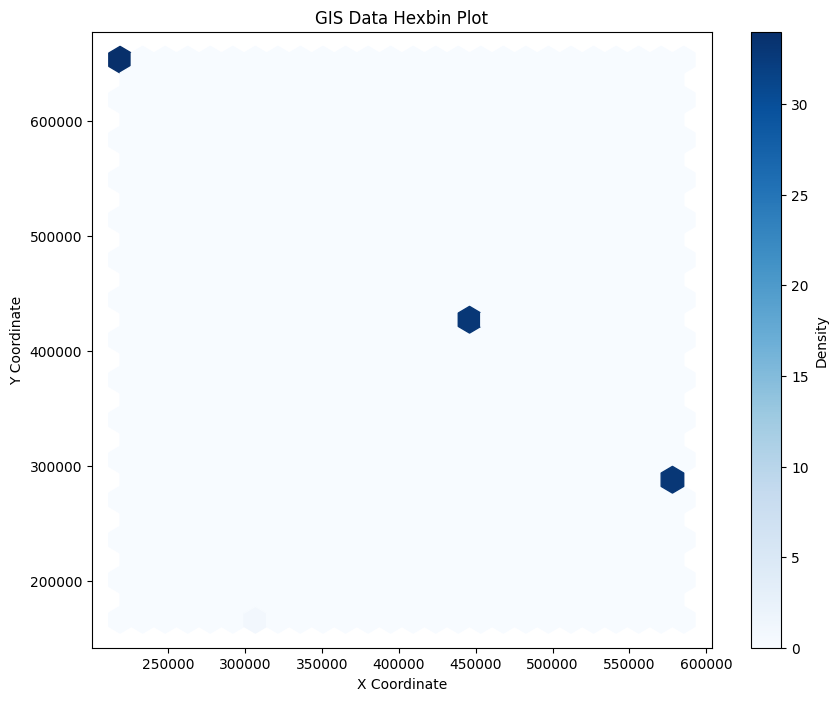

In [66]:
# Create a hexbin plot for GIS data density
plt.figure(figsize=(10, 8))
plt.hexbin(gis_data['X_coordinate'], gis_data['Y_coordinate'], gridsize=25, cmap='Blues')

plt.title('GIS Data Hexbin Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.colorbar(label='Density')

# Display the plot
plt.show()


In [20]:
# Load the map image
map_image = plt.imread('/content/UK.png')

In [22]:
# Create a GeoDataFrame from the X_coordinate and Y_coordinate
geometry = [Point(xy) for xy in zip(gis_data['X_coordinate'], gis_data['Y_coordinate'])]
crs = {'init': 'epsg:4326'}  # Assuming WGS84 coordinate system
gis_gdf = gpd.GeoDataFrame(gis_data, crs=crs, geometry=geometry)


/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [24]:
# Calculate the extent based on the X and Y coordinates
xmin, xmax = gis_data['X_coordinate'].min(), gis_data['X_coordinate'].max()
ymin, ymax = gis_data['Y_coordinate'].min(), gis_data['Y_coordinate'].max()



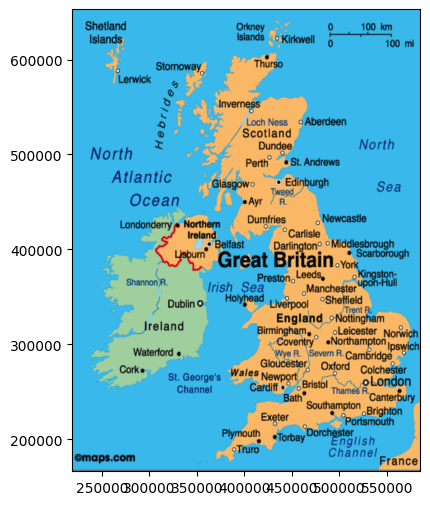

In [55]:
# Save the plot as an image with a smaller figure size
fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(map_image, extent=[xmin, xmax, ymin, ymax])

In [56]:
# Define a function to embed image and text in annotation
def annotate_with_image(x, y, image_path, text, ax):
    img = plt.imread('/content/UK.png')
    ax.imshow(img, extent=[x-0.1, x+0.1, y-0.1, y+0.1], aspect='auto')
    ax.text(x, y, text, fontsize=8, ha='left', va='bottom', color='blue')

In [59]:
# Add annotations with embedded map images
for x, y, site, tech in zip(gis_data['X_coordinate'], gis_data['Y_coordinate'],
                            gis_data['Site_Name'], gis_data['Technology_Type']):
    '/content/UK.png' == 'gis_map_annotations.png'  # Path to the map image
    text = f'Site: {site}\nTech: {tech}'  # Text for the annotation
    annotate_with_image(x, y, '/content/UK.png', text, ax)

In [62]:
# Display the plot
plt.show()

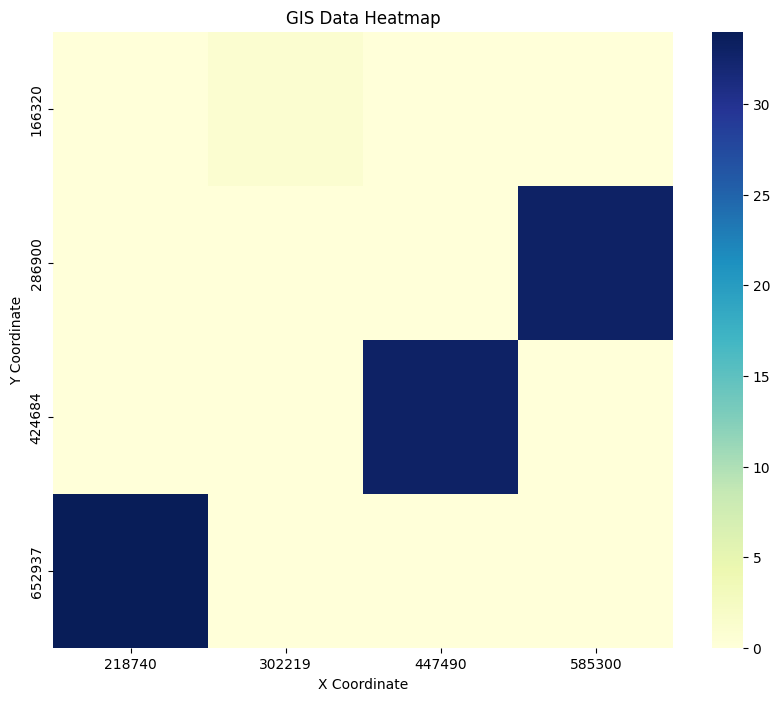

In [65]:

# Create a heatmap for GIS data density
plt.figure(figsize=(10, 8))
sns.heatmap(gis_data.pivot_table(index='Y_coordinate', columns='X_coordinate',
                                            aggfunc='size', fill_value=0), cmap='YlGnBu')

plt.title('GIS Data Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Display the plot
plt.show()
